# Семинар 4 - Линейные модели

In [8]:
import pandas as pd
import numpy as np
%matplotlib inline 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(palette='deep', style='darkgrid', rc={'figure.figsize': (15, 4)})
import scipy.stats as st 

import warnings 
warnings.simplefilter('ignore')

Сгенерируем исскуственные данные

In [4]:
def function(x):
    return 3*x + 4

x_true = np.array([-2, 2])
y_true = function(x_true)

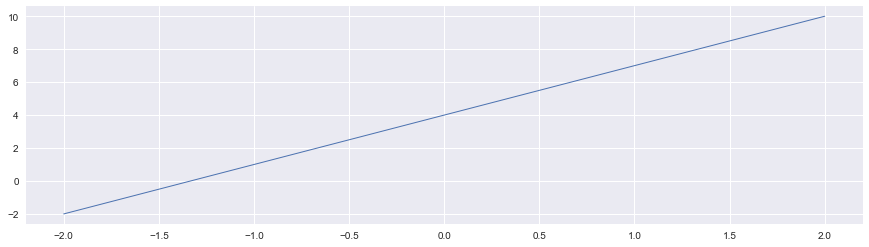

In [13]:
plt.plot(x_true, y_true, linewidth=1);

In [6]:
n = 100
x = np.random.rand(n, 1)*4-2
noise = np.random.rand(n, 1)*4-2
y = function(x) + noise

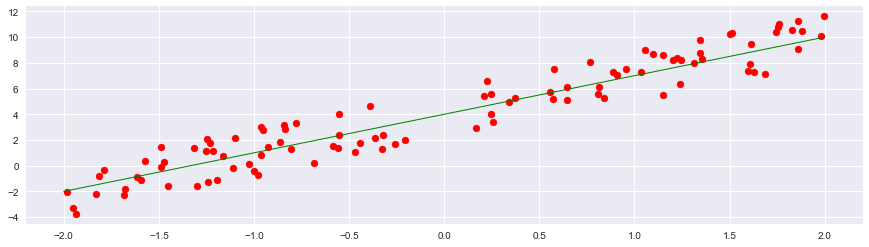

In [11]:
plt.scatter(x, y, color='r')
plt.plot(x_true, y_true, color='g', linewidth=1)
plt.show()

#  Аналитический метод

$$\hat \theta = \bigl(X^T \cdot X  \bigr)^{-1} \cdot X^T \cdot y $$

In [15]:
x_matrix = np.c_[np.ones((n, 1)), x]

In [19]:
%%time
thetha_matrix = np.linalg.inv(x_matrix.T.dot(x_matrix)).dot(x_matrix.T).dot(y)

CPU times: user 550 µs, sys: 388 µs, total: 938 µs
Wall time: 583 µs


In [23]:
thetha_matrix.T[0].tolist()

[4.110530908931982, 3.160412789776613]

In [25]:
print("Свободный член: {[0][0]:.7}".format(thetha_matrix.T))
print("Коэфициент: {[0][1]:.7}".format(thetha_matrix.T))

Свободный член: 4.110531
Коэфициент: 3.160413


In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [27]:
%%time 
lr = LinearRegression()
lr.fit(x, y)

CPU times: user 51.5 ms, sys: 20.7 ms, total: 72.1 ms
Wall time: 760 ms


In [28]:
print("Свободный член: {:.7}".format(lr.intercept_[0]))
print("Коэфициент: {:.7}".format(lr.coef_[0][0]))

Свободный член: 4.110531
Коэфициент: 3.160413


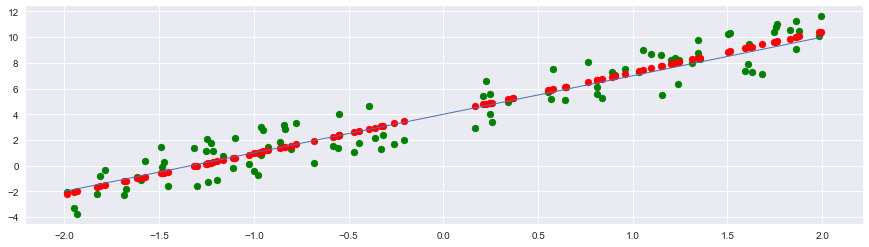

In [30]:
plt.scatter(x, y, color='g')
plt.scatter(x, lr.predict(x), color='r')
plt.plot(x_true, y_true, linewidth=1)
plt.show()

# Пакетный градиентный спуск

$$\nabla MSE(\theta)= \frac{2}{l} X^T \cdot \bigl(X \cdot \theta - y \bigr) $$
### Реализация в numpy

In [31]:
from tqdm import tqdm

100%|██████████| 100/100 [00:00<00:00, 3994.84it/s]


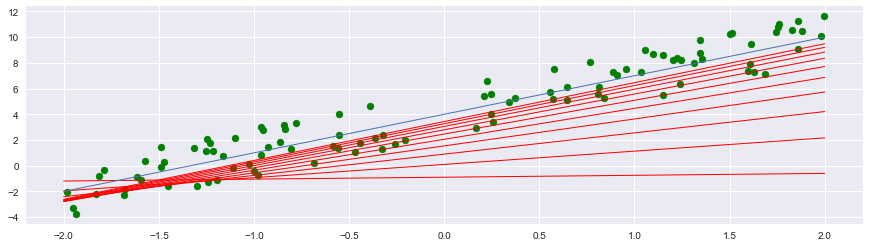

[4.110530907899879, 3.1604127897605654]


In [33]:
learning_rate = 0.1
n_iterations = 100

theta = np.random.randn(2, 1)

plt.scatter(x, y, color='g')
for iteration in tqdm(range(n_iterations)):
    if iteration < 10:
        plt.plot(x_true, x_true*theta[1]+theta[0], linewidth=1, color='r')
    gradients = 2/n * x_matrix.T.dot(x_matrix.dot(theta) - y)
    theta -= learning_rate * gradients
    
plt.plot(x_true, y_true, linewidth=1)
plt.show()

print(theta.T[0].tolist())

### Слишком маленький шаг обучения (learning rate)

100%|██████████| 100/100 [00:00<00:00, 3468.37it/s]


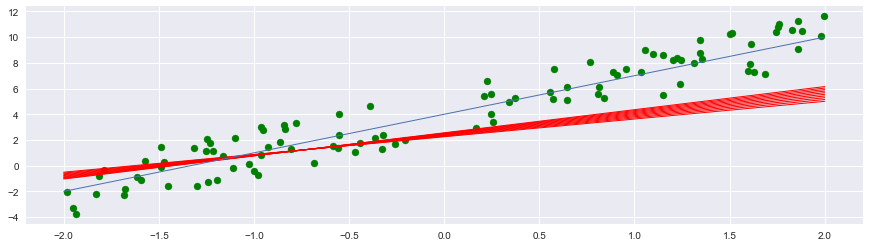

[3.8616842059620677, 3.06935983168605]


In [35]:
learning_rate = 0.01
n_iterations = 100

theta = np.random.randn(2, 1)

plt.scatter(x, y, color='g')
for iteration in tqdm(range(n_iterations)):
    if iteration < 10:
        plt.plot(x_true, x_true*theta[1]+theta[0], linewidth=1, color='r')
    gradients = 2/n * x_matrix.T.dot(x_matrix.dot(theta) - y)
    theta -= learning_rate * gradients
    
plt.plot(x_true, y_true, linewidth=1)
plt.show()

print(theta.T[0].tolist())

### Слишком большой шаг обучения (learning rate)

100%|██████████| 100/100 [00:00<00:00, 3580.50it/s]


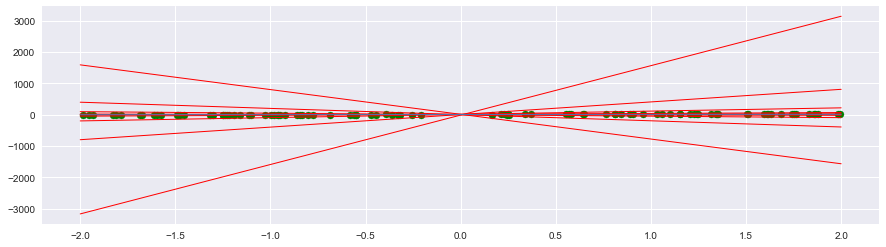

[3.284737102726719e+28, -2.1128261966865765e+30]


In [39]:
learning_rate = 1.01
n_iterations = 100

theta = np.random.randn(2, 1)

plt.scatter(x, y, color='g')
for iteration in tqdm(range(n_iterations)):
    if iteration < 10:
        plt.plot(x_true, x_true*theta[1]+theta[0], linewidth=1, color='r')
    gradients = 2/n * x_matrix.T.dot(x_matrix.dot(theta) - y)
    theta -= learning_rate * gradients
    
plt.plot(x_true, y_true, linewidth=1)
plt.show()

print(theta.T[0].tolist())

# Уменьшение шага на каждой итерации

In [40]:
learning_rate = 1
n_iterations = 1000

theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients = 2/n * x_matrix.T.dot(x_matrix.dot(theta) - y)
    theta -= (learning_rate/(iteration + 1)) * gradients
    
print(theta.T.tolist())

[[4.110530909743645, 3.160412789435898]]


Learning rate - гипперпараметр, и можно воспользоваться GridSearchCV, однако чтобы не учить каждый раз такое кол-во итераций, мы можем измерять норму градиента, и прекращать спуск, когда он "затух"

In [45]:
learning_rate = 0.1
n_iterations = 1000
tol = 0.01

theta = np.random.randn(2, 1)

for iteration in range(n_iterations):
    gradients = 2/n * x_matrix.T.dot(x_matrix.dot(theta) - y)
    if np.linalg.norm(gradients) < tol:
        break
    theta -= learning_rate * gradients
    
print('Градиент затух на {} итерации '.format(iteration))
print(theta.T.tolist())

Градиент затух на 30 итерации 
[[4.10641211182658, 3.160227709989504]]


__Реализация в Scikit-Learn отсутствует__

# Cтохастический градиентный спуск 

In [48]:
n_epochs = 1000

def learning_schedule(t):
    return t0 / (t + t1)

t0 = 5
t1 = 100  

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(n):
        random_index = np.random.randint(n)
        xi = x_matrix[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * n + i)
        theta = theta - eta * gradients
print(theta)

[[ 4.12144092]
 [ 3.1535069 ]]


In [55]:
from sklearn.linear_model import SGDRegressor

In [56]:
sgd = SGDRegressor(tol=0.0001)
sgd.fit(x, y)
sgd.intercept_, sgd.coef_

(array([ 4.07973051]), array([ 3.15607383]))

# Полиномиальные модели

$y = \cos(x)$, $x \in [-5,5]  $
   
  
$y = \cos(x) + \varepsilon$, где  $\varepsilon = \mathscr{N} \bigl(0,\frac{1}{2} \bigr)$, $x \in [-5,5]$

In [58]:
n = 100
n2 = 20
x = np.linspace(-5, 5, num=n)
x_dt = np.linspace(-5, 5, num=n2)
y_true = np.cos(x)
noise = np.random.sample(n2)/2-0.25
y_noised = np.cos(x_dt) + noise

In [59]:
noise

array([-0.20028191, -0.22546408, -0.17189911, -0.12706695,  0.12320674,
        0.10265274, -0.18193333, -0.11564132,  0.22629525, -0.24065533,
        0.17677173,  0.03133953, -0.04667538, -0.02738552, -0.03516869,
        0.07036179, -0.17182091, -0.23745212,  0.01037825, -0.03752678])

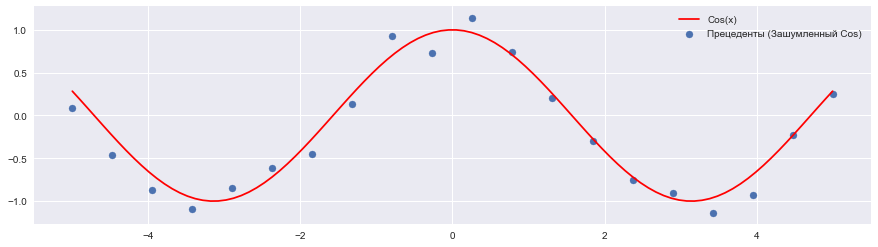

In [61]:
plt.scatter(x_dt, y_noised, label="Прецеденты (Зашумленный Cos)")
plt.plot(x, y_true, color='red', label='Cos(x)')
plt.legend()
plt.show()

In [62]:
from sklearn.preprocessing import PolynomialFeatures

In [63]:
LR = LinearRegression()

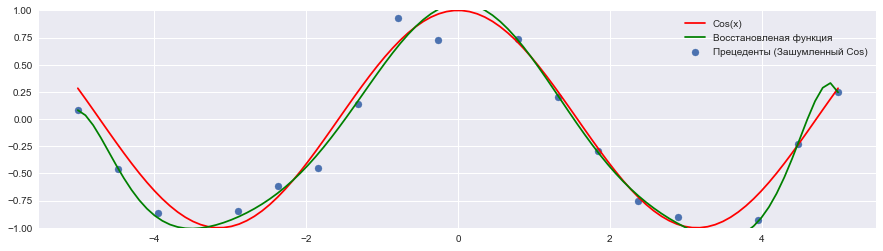

In [64]:
poly = PolynomialFeatures(12)
x_poly2 = poly.fit_transform(x_dt.reshape(-1, 1))
LR.fit(x_poly2, y_noised)
pred = LR.predict(poly.transform(np.linspace(-5, 5, num=n).reshape(-1, 1)))
pred_poly_11 = LR.predict(x_poly2)
plt.scatter(x_dt,y_noised,  label="Прецеденты (Зашумленный Cos)")
plt.plot(x,y_true, color='red', label="Cos(x)")
plt.plot(np.linspace(-5,5,num=n),pred, color='green', label="Восстановленая функция")
plt.ylim([-1,1])
plt.legend()
plt.show()

# Регуляризация моделей

In [65]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [66]:
LR = Lasso()

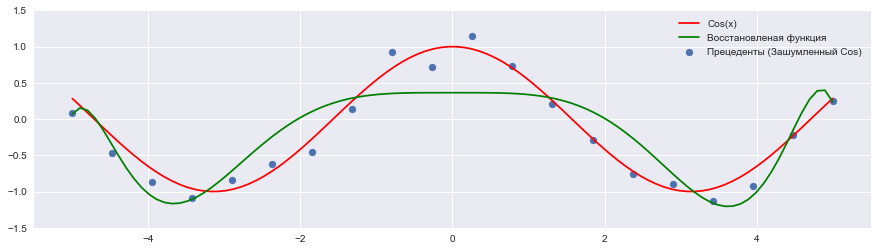

In [68]:
poly = PolynomialFeatures(15)
x_poly2 = poly.fit_transform(x_dt.reshape(-1, 1))
LR.fit(x_poly2, y_noised)
pred = LR.predict(poly.transform(np.linspace(-5,5,num=n).reshape(-1, 1)))
pred_poly_11 = LR.predict(x_poly2)
plt.scatter(x_dt,y_noised,  label="Прецеденты (Зашумленный Cos)")
plt.plot(x,y_true, color='red', label="Cos(x)")
plt.plot(np.linspace(-5,5,num=n),pred, color='green', label="Восстановленая функция")
plt.ylim([-1.5,1.5])
plt.legend()
plt.show()

In [69]:
pd.DataFrame(np.round(LR.coef_, decimals=2), columns=['Feature Coef']).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Feature Coef,0.0,-0.0,-0.0,-0.0,-0.03,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0
